<a href="https://colab.research.google.com/github/liuxx479/1020/blob/master/unfair_coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import numpy as np
from pylab import *
from numpy import math
%matplotlib inline

In [113]:
####### set up the coins, head=1, tail=-1
####### p = the number of possibility to be head
coin=lambda p, N_toss, N_attempts: (rand(N_attempts, N_toss)<p)*2-1

In [248]:
###############################
########## Toss the coins here
##############################

N_toss=5000
N_attempts=2000 # for error bar
Tosses = np.arange(1,N_toss+1) ## toss counter

###### scenario 1: A 51% head; B 49% head
p1A, p1B=0.49, 0.51

###### toss the coins
results1A = coin(p1A, N_toss, N_attempts)
results1B = coin(p1B, N_toss, N_attempts)

###### scenario 2: A 1% head; B 2% head
p2A, p2B=0.01, 0.02

###### toss the coins
results2A = coin(p2A, N_toss, N_attempts)
results2B = coin(p2B, N_toss, N_attempts)

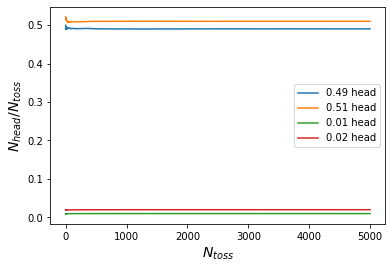

In [249]:
###### plot out all the results, make sure coin function is right

plot(Tosses, cumsum(mean(results1A==1,axis=0))/Tosses,label='%s head'%(p1A))
plot(Tosses, cumsum(mean(results1B==1,axis=0))/Tosses,label='%s head'%(p1B))
plot(Tosses, cumsum(mean(results2A==1,axis=0))/Tosses,label='%s head'%(p2A))
plot(Tosses, cumsum(mean(results2B==1,axis=0))/Tosses,label='%s head'%(p2B))
xlabel('$N_{toss}$',fontsize=14)
ylabel('$N_{head}/N_{toss}$',fontsize=14)
legend()
show()

In [264]:
def plot_results(out, iylabel, ititle, null_value, iprob, err_theory):
  imean, istd = mean(out,axis=0), std(out,axis=0) ## data mean, std
  # print (imean.shape, istd.shape)

  plot(Tosses, imean+err_theory, 'c-',label='theoretical error')
  plot(Tosses, null_value*ones(N_toss), 'k-', label='null')   ##### null
  plot(Tosses, out[100],'-',label='1 sample experiment')
  plot(Tosses, imean, 'r-',label='avg %i experiments'%(N_attempts))  
  fill_between(Tosses, imean-istd, imean+istd, color='r', alpha=0.5, label='std %i experiments'%(N_attempts))  

  idx=where (abs(imean-null_value)>istd)[0]
  idx_theory=where (abs(imean-null_value)>err_theory)[0]
  if len(idx)>0:
    ititle+='\n Need tosses: %i (MC), %i (theory)'%(Tosses[idx[0]], Tosses[idx_theory[0]]) 
  xlabel('$N_{toss}$',fontsize=14)
  ylabel(iylabel, fontsize=14)
  ylim(imean[100]-3*istd[100], imean[100]+3*istd[100])
  legend(loc='lower right')
  title(ititle)
  show()

(5000,) (5000,)


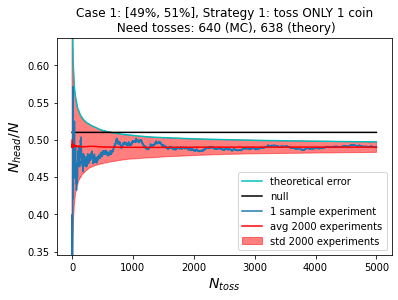

(5000,) (5000,)


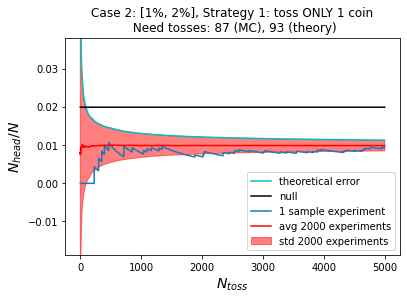

In [262]:
###### strategy 1: just toss 1 coin and see its head and tail difference
bino=lambda p: sqrt(Tosses*p*(1-p))/Tosses ### binomial distribution

#### case 1
out = cumsum((results1A==1)*1, axis=1)/Tosses
ititle='Case 1: [49%, 51%], Strategy 1: toss ONLY 1 coin'
iylabel='$N_{head} / N$'
plot_results(out, iylabel, ititle, null_value = p1B, iprob=p1A, err_theory=bino(p1A))

# ###### case 2
out = cumsum((results2A==1)*1, axis=1)/Tosses
ititle='Case 2: [1%, 2%], Strategy 1: toss ONLY 1 coin'
iylabel='$N_{head} / N$'
plot_results(out, iylabel, ititle, null_value = p2B, iprob=p2A, err_theory=bino(p2A))

(5000,) (5000,)


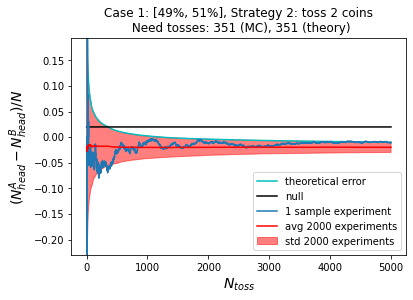

(5000,) (5000,)


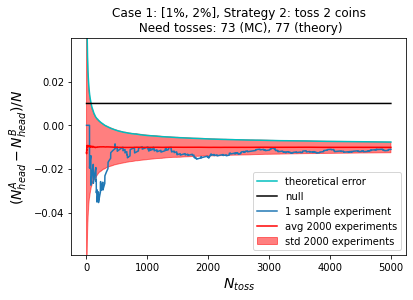

In [263]:
####### strategy 2: toss 2 coins simultaneously, and look at their differences

joint = lambda p1, p2: sqrt(bino(p1)**2+bino(p2)**2)

#### case 1
out = cumsum((results1A==1)*1-(results1B==1)*1, axis=1)/Tosses
ititle='Case 1: [49%, 51%], Strategy 2: toss 2 coins'
iylabel='$(N_{head}^A-N_{head}^B)/ N$'
plot_results(out, iylabel, ititle, null_value = p1B-p1A, iprob=p1A, err_theory=joint(p1A, p1B))

###### case 2
out = cumsum((results2A==1)*1-(results2B==1)*1, axis=1)/Tosses
ititle='Case 1: [1%, 2%], Strategy 2: toss 2 coins'
iylabel='$(N_{head}^A-N_{head}^B)/ N$'
plot_results(out, iylabel, ititle, null_value = p2B-p2A, iprob=p2A, err_theory=joint(p2A, p2B))